In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
path = Path('data')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from fastai import tabular

### Define the variables

In [3]:
train_df = pd.read_pickle(path/'train_df')
test_df = pd.read_pickle(path/'test_df')

In [4]:
cat_vars = set()
cont_vars = set()
label_var = 'Sales'

In [5]:
object_columns = train_df.select_dtypes(include='object').dtypes.index
object_columns

Index(['StoreType', 'Assortment', 'PromoInterval', 'State', 'Events'], dtype='object')

In [6]:
cat_vars = cat_vars.union(set(object_columns))

In [7]:
bool_columns = train_df.select_dtypes(include='bool').dtypes.index
bool_columns

Index(['Promo', 'StateHoliday', 'SchoolHoliday', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Promo2'],
      dtype='object')

In [8]:
cat_vars = cat_vars.union(set(bool_columns))

In [9]:
int32_columns = train_df.select_dtypes(include='int32').dtypes.index
int32_columns

Index(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear'],
      dtype='object')

In [10]:
cat_vars = cat_vars.union(set(int32_columns))

In [11]:
int64_columns = train_df.select_dtypes(include='int64').dtypes.index
int64_columns

Index(['Store', 'Sales', 'Customers', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Elapsed', 'trend', 'trend_DE',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'WindDirDegrees',
       'Promo2Days', 'Promo2Weeks', 'CompetitionDaysOpen',
       'CompetitionMonthsOpen', 'AfterClosed', 'BeforeClosed',
       'AfterSchoolHoliday', 'BeforeSchoolHoliday', 'AfterStateHoliday',
       'BeforeStateHoliday', 'AfterPromo', 'BeforePromo', 'Closed_bw',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'Closed_fw',
       'SchoolHoliday_fw', 'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [12]:
cat_vars = cat_vars.union({'Store', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Promo2Weeks', 
                           'CompetitionMonthsOpen', 'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 
                           'SchoolHoliday_fw', 'StateHoliday_fw', 'Promo_fw', 'Closed_bw', 'Closed_fw'})
cont_vars = cont_vars.union({'trend', 'trend_DE', 'Max_TemperatureC', 'Mean_TemperatureC', 
                             'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 
                             'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
                             'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
                             'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'WindDirDegrees', 'Promo2Days', 
                             'CompetitionDaysOpen', 'AfterSchoolHoliday', 'BeforeSchoolHoliday', 
                             'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo', 
                             'AfterClosed', 'BeforeClosed'})

In [13]:
float64_columns = train_df.select_dtypes(include='float64').dtypes.index
float64_columns

Index(['CompetitionDistance', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'Precipitationmm',
       'CloudCover'],
      dtype='object')

In [14]:
cont_vars = cont_vars.union(float64_columns)

In [15]:
set(train_df.columns).difference(cat_vars | cont_vars)

{'CompetitionOpenSince',
 'Customers',
 'Date',
 'Elapsed',
 'Promo2Since',
 'Sales'}

In [16]:
cat_vars = sorted(cat_vars)
cont_vars = sorted(cont_vars)

In [17]:
train_df[cat_vars].astype('object').describe().T

,count,unique,top,freq
Assortment,844338,3,a,444875
Closed_bw,844338,7,1,700949
Closed_fw,844338,7,1,700678
CompetitionMonthsOpen,844338,25,24,386213
CompetitionOpenSinceMonth,844338,12,1,278897
CompetitionOpenSinceYear,844338,23,1900,269222
Day,844338,31,11,30119
Dayofweek,844338,7,5,144052
Dayofyear,844338,365,2,3341
Events,641281,21,Rain,324320


In [18]:
train_df[cont_vars].describe().T[['count', 'min', 'max']]

,count,min,max
AfterClosed,844338.0,0.0,926.00
AfterPromo,844338.0,0.0,188.00
AfterSchoolHoliday,844338.0,0.0,107.00
AfterStateHoliday,844338.0,0.0,135.00
BeforeClosed,844338.0,0.0,986.00
BeforePromo,844338.0,0.0,16.00
BeforeSchoolHoliday,844338.0,0.0,194.00
BeforeStateHoliday,844338.0,0.0,195.00
CloudCover,776282.0,0.0,8.00
CompetitionDaysOpen,844338.0,0.0,9177.00


In [19]:
train_df[label_var].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

### Build the dataset

In [20]:
df = train_df[cat_vars + cont_vars + [label_var, 'Date']].copy()

In [21]:
df.Date.iloc[0], df.Date.iloc[-1]

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [22]:
test_df.Date.iloc[0], test_df.Date.iloc[-1]

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [23]:
cut_date = train_df.Date.iloc[train_df.shape[0] - test_df.shape[0]]
valid_idx = train_df.index[train_df.Date > cut_date].tolist()

valid_idx[0], valid_idx[-1]

(809658, 844337)

In [24]:
procs = [tabular.FillMissing, tabular.Categorify, tabular.Normalize]

In [25]:
test_data = tabular.TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars)
data = (tabular.TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
        .split_by_idx(valid_idx)
        .label_from_df(cols=label_var, label_cls=tabular.FloatList, log=True)
        .add_test(test_data)
        .databunch())

len(data.train_ds), len(data.valid_ds)

(809658, 34680)

### Train the model

In [26]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = tabular.torch.tensor([0, max_log_y], device=tabular.defaults.device)

In [27]:
learn = tabular.tabular_learner(data, 
                                layers=[1000, 500], 
                                ps=[0.001, 0.01], 
                                emb_drop=0.04, 
                                y_range=y_range, 
                                metrics=tabular.exp_rmspe)

In [28]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(8, 5)
    (2): Embedding(8, 5)
    (3): Embedding(26, 10)
    (4): Embedding(13, 7)
    (5): Embedding(24, 9)
    (6): Embedding(32, 11)
    (7): Embedding(8, 5)
    (8): Embedding(366, 44)
    (9): Embedding(22, 9)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(13, 7)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(25, 10)
    (20): Embedding(9, 5)
    (21): Embedding(27, 10)
    (22): Embedding(4, 3)
    (23): Embedding(7, 5)
    (24): Embedding(7, 5)
    (25): Embedding(3, 3)
    (26): Embedding(9, 5)
    (27): Embedding(9, 5)
    (28): Embedding(13, 7)
    (29): Embedding(3, 3)
    (30): Embedding(4, 3)
    (31): Embedding(4, 3)
    (32): Embedding(1116, 81)
    (33): Embedding(5, 4)
    (34): Embedding(53, 15)
    (35): Embedding(4, 3)
    (36): Embe

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


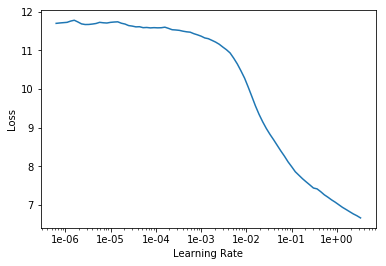

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,0.022802,0.019900,0.138295
2,0.019902,0.025917,0.172871
3,0.014669,0.014708,0.120122
4,0.012068,0.017258,0.120871
5,0.010232,0.012781,0.110366


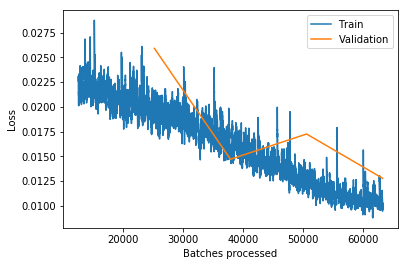

In [31]:
learn.recorder.plot_losses(last=-1)

In [32]:
learn.save('stage1')

In [36]:
learn.load('stage1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


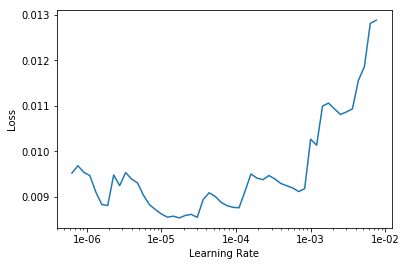

In [34]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,exp_rmspe
1,0.010233,0.012631,0.109698
2,0.010288,0.012418,0.109913
3,0.009823,0.012773,0.110692
4,0.009379,0.014302,0.112351
5,0.011117,0.013381,0.110699


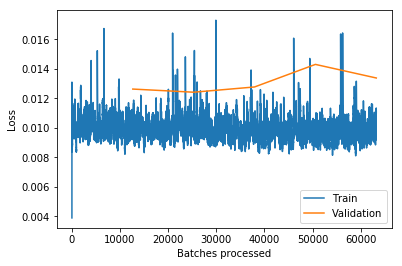

In [38]:
learn.recorder.plot_losses()

In [39]:
learn.save('stage2')

### Evaluate the model

In [103]:
learn.load('stage2');

In [104]:
valid_preds = learn.get_preds(tabular.DatasetType.Valid)

In [105]:
eval_df = df.iloc[valid_idx].copy()
eval_df['PredSales'] = np.exp(valid_preds[0].data).numpy().T[0]

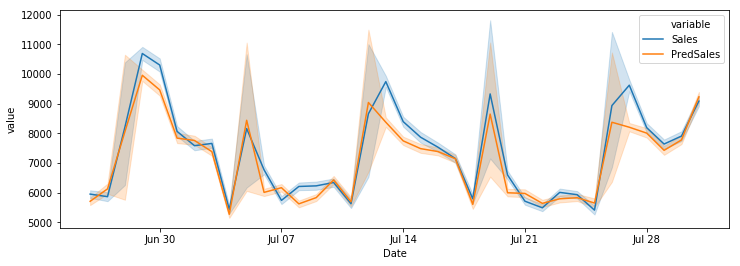

In [107]:
# Plot actual and predicted time series
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

grouped = eval_df.melt(id_vars=['Date'], value_vars=['Sales', 'PredSales'])

f, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x="Date", y="value", hue="variable", data=grouped, ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.show()

### Explore learned embeddings

In [108]:
# Discover whether the model captures geographical information
def get_embeddings(fld):
    embeddings = learn.model.embeds[cat_vars.index(fld)]
    return embeddings(tabular.torch.LongTensor(range(embeddings.num_embeddings))).detach().cpu().numpy()

store_embeddings = get_embeddings('State')
store_embeddings.shape

(13, 7)

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
store_pca = pca.fit(store_embeddings.T).components_.T
store_pca.shape

(13, 2)

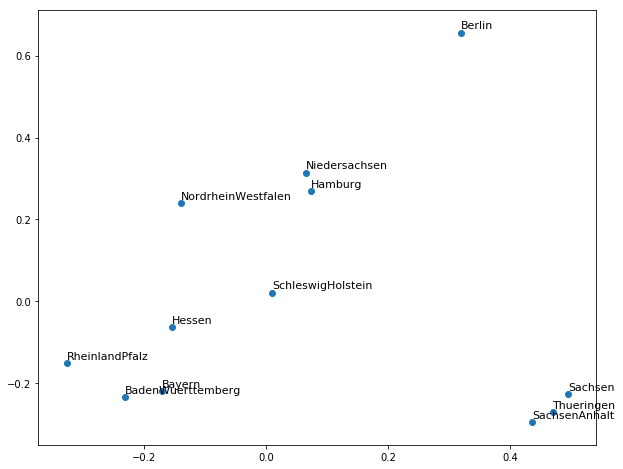

In [110]:
X = store_pca[1:, 0]
Y = store_pca[1:, 1]
plt.figure(figsize=(10, 8))
plt.scatter(X, Y)
state_name = dict(pd.read_csv(path/'state_names.csv')[['State', 'StateName']].values.tolist())
for i, (x, y) in enumerate(zip(X, Y)):
    plt.text(x, y + 0.01, state_name[learn.data.classes['State'][i+1]], fontsize=11)
plt.show()

In [111]:
# Discover whether the model captures temporal information
dayofweek_embeddings = get_embeddings('Dayofweek')
dayofweek_embeddings.shape

(8, 5)

In [112]:
pca = PCA(n_components=2)
dayofweek_pca = pca.fit(dayofweek_embeddings.T).components_.T
dayofweek_pca.shape

(8, 2)

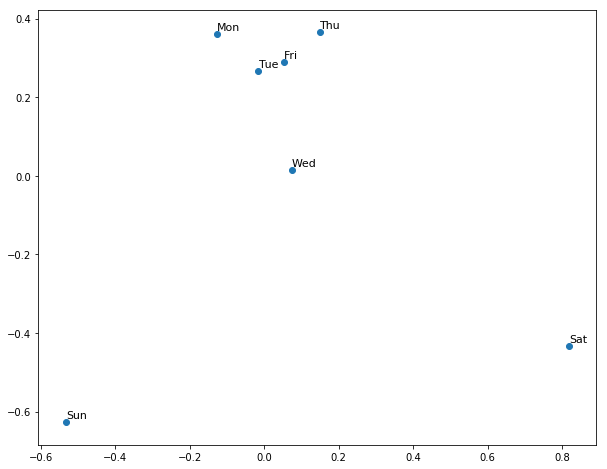

In [113]:
X = dayofweek_pca[1:, 0]
Y = dayofweek_pca[1:, 1]
plt.figure(figsize=(10, 8))
plt.scatter(X, Y)
dayofweek_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, (x, y) in enumerate(zip(X, Y)):
    plt.text(x, y + 0.01, dayofweek_names[i], fontsize=11)
plt.show()